# INFO 2950 Fall 2024 Homework 3

For each answer code cell, **do not** erase the line stating `#A1: your code here`; instead, write your answer code directly below the line.

When you turn in this homework, all cells must be executed and the notebook saved with output included. You must also save your **fully executed notebook** as a pdf following the instructions in the Student Handbook posted on Canvas > Modules > Course Policies.

A **fully executed notebook** means that you should be seeing the expected output printed below the cell after you click "Restart Kernel and Run All Cells." *If any cell in the PDF of your notebook does not have the expected output printed below it, it will not be considered fully executed and you will not receive points for the questions in that cell.*

**If you use any sources aside from the standard NumPy documentation, you must cite the sources (e.g., StackOverflow links) used to answer the below questions. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct.**

The goal of this homework is to get hands-on experience with linear regression in two real-world datasets. You will investigate covariance, correlation, linear regression, and logistic regression. Througout the problem set, you will be asked to interpret your results.

Part of this homework will involve practicing how to use online resources. *Nobody* remembers everything. There is no level of experience that will allow you to never use documentation and question-answer forums. The key is to use these in ways that help you grow your skills, not in ways that prevent you from growing. They also provide an opportunity to express gratitude for people who helped you.

**NetID:** kl739

---

### Problem 0
Do not move or modify this cell, we use it for automated homework analysis.

**This problem is for you to use to cite your sources.**

You will update this problem over the course of the homework. Describe problems, error messages, and bugs you encountered, and how you fixed or addressed them. List URLs for any online resources (like Stack Overflow) you found useful and mention fellow students, TAs, or other people who helped you. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct. If you do not appropriately fill out Problem 0, you will receive 0 points on the entire homework assignment.


**ADD YOUR SOURCES HERE**

---

# Part 0: Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
import duckdb
import requests
from bs4 import BeautifulSoup
import time

**Note:** If you receive a `ModuleNotFoundError: No module named "sklearn"` when you run the import statements above, you should:
1. Uncomment and run the below cell: `%pip install scikit-learn`
2. Click 'Kernel > Restart Kernel and Clear Outputs of All Cells...'
4. Rerun the import statements

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


---

### Goal: Data Cleaning
For this homework, you'll be using a dataset about number of yearly visitors to United States national parks.

### Problem A1 (1 points)
Load in `national_parks_visitors.csv` with `pandas`. Name the dataframe `national_park_df`. Print the shape of the dataframe.

In [3]:
## A1: your code here
national_park_df = pd.read_csv('national_parks_visitors.csv')
print(national_park_df.shape)

(231, 21)


**A1 Expected Output**:

```
(231, 21)
```

---

### Problem A2 (2 points)
Convert the `national_park_df` dataframe to tidy (i.e. "narrow" or "long") format. The resulting dataframe columns should be `ParkName`, `ParkType`, `Region`, `State`, `Acres`, `Year`, and `Visitors`. We'd recommend you use the [`pd.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function to do this. Print the shape of the dataframe. Display the first five rows of the dataframe.

In [4]:
## A2: your code here
national_park_df = pd.melt(national_park_df, id_vars = \
                ['ParkName', 'ParkType', 'Region', 'State', 'Acres'], \
            value_vars = ['2023', '2022', '2021', '2020','2019', '2018', \
                 '2017', '2016', '2015', '2014', '2013', '2012', \
                 '2011', '2010', '2009', '2008'], \
            var_name = 'Year', value_name = 'Visitors')
print(national_park_df.shape)
print(national_park_df.head())

(3696, 7)
               ParkName                  ParkType         Region State  \
0             Acadia NP             National Park      Northeast    ME   
1             Adams NHP  National Historical Park      Northeast    MA   
2  Agate Fossil Beds NM         National Monument        Midwest    NE   
3           Amistad NRA  National Recreation Area  Intermountain    TX   
4     Andersonville NHS    National Historic Site      Southeast    GA   

      Acres  Year   Visitors  
0  49071.40  2023  3879890.0  
1     23.82  2023    25229.0  
2   3057.87  2023    15562.0  
3  62945.15  2023   836733.0  
4    515.61  2023    77740.0  


**A2 Expected Output**:

```
(3696, 7)
               ParkName                  ParkType          Region State  \
0             Acadia NP             National Park      Northeast     ME   
1             Adams NHP  National Historical Park      Northeast     MA   
2  Agate Fossil Beds NM         National Monument        Midwest     NE   
3           Amistad NRA  National Recreation Area  Intermountain     TX   
4     Andersonville NHS    National Historic Site      Southeast     GA   

      Acres  Year   Visitors  
0  49071.40  2023  3879890.0  
1     23.82  2023    25229.0  
2   3057.87  2023    15562.0  
3  62945.15  2023   836733.0  
4    515.61  2023    77740.0  
```


---

### Problem A3 (1 points)
Convert data in the `Year` column to an `int`. Print the `dtype` of the `Year` column before and after you convert it.

In [5]:
## A3: your code here
print(national_park_df['Year'].dtype)
print(national_park_df['Year'].astype(int).dtype)

object
int64


**A3 Expected Output:**  

```
object
int64
```

*Note: it is also fine if you get `int32` instead of `int64`. This means your machine is working with 4 bytes instead of 8 bytes.*



---

### Problem A4 (3 points)
Use `sns.lineplot` to visualize the number of `Visitors` of `National Parks` in the `Northeast` Region as a time series.

*Hint: not every park in the dataset has `ParkType == National Park` - make sure you're filtering on all relevant variables!*

Make sure your plot follows the 5 specifications below:
1. Use `Year` as the x-axis and `Visitors` as the y-axis.
2. Visualize this data as a line plot with markers (Set parameter `marker='o'`).
3. Use a different color for each `ParkName`. You can look up the `hue` parameter in `seaborn`'s [official documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
4. Let's put the legend outside of the graph so that it's easier to read. You can look up the `move_legend` function in `seaborn`'s [official documentation](https://seaborn.pydata.org/generated/seaborn.move_legend.html)
5. Lastly, use the `pyplot` function [`xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) to rotate the tick labels for the dates in the x-axis by 45 degrees.

*Note: if you don't want to print out a bunch of extra text when plotting, you can put a `;` at the end of your code.*

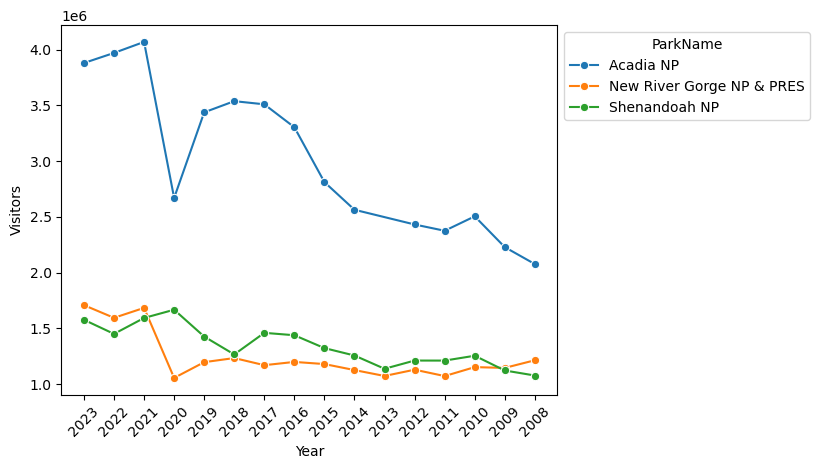

In [6]:
## A4: your code here
visual_data = national_park_df[(national_park_df['ParkType'] \
                    == 'National Park') & \
                    (national_park_df['Region'] == 'Northeast')]
plot = sns.lineplot(data = visual_data, x = 'Year', y = 'Visitors'\
                , marker = 'o', hue = 'ParkName', legend = 'auto')
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.show()

---

### Problem A5 (2 points)
Examine the plot from Problem A4. Have you noticed any missing data? Report `ParkName`, `Year`.

**A5: Your answer here.**  
The number of visitors for Acadia NP in 2013 is missing. 

---

### Problem A6 (2 points)

The missing number of `Visitors` from `ParkName`, `Year` identified in Problem A5 is `2,254,922`.

Use `pd.DataFrame.loc` to set the correct value in the national parks dataframe. Print the mean of `Visitors`, rounded to the second decimal place using `round`.

**Additional Resources:**  
- `pd.DataFrame.loc`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- `round`: https://docs.python.org/3/library/functions.html#round

In [7]:
## A6: your code here
national_park_df.loc[(national_park_df['ParkName'] == 'Acadia NP') \
        & (national_park_df['Year'] == '2013'), 'Visitors'] = 2254922
print(round(national_park_df['Visitors'].mean(), 2))

902907.13


**A6 Expected Output:**
```
902907.13
```

---

### Problem A7 (3 points)

Visualize the number of `Visitors` of national parks in `Northeast` Region as a time series again. Use the same specification as in **Problem A4**.

Additionally, use the `pyplot` function `title` to give the plot a title: `"Number of Visitors to National Parks in the Northeast Region"`.

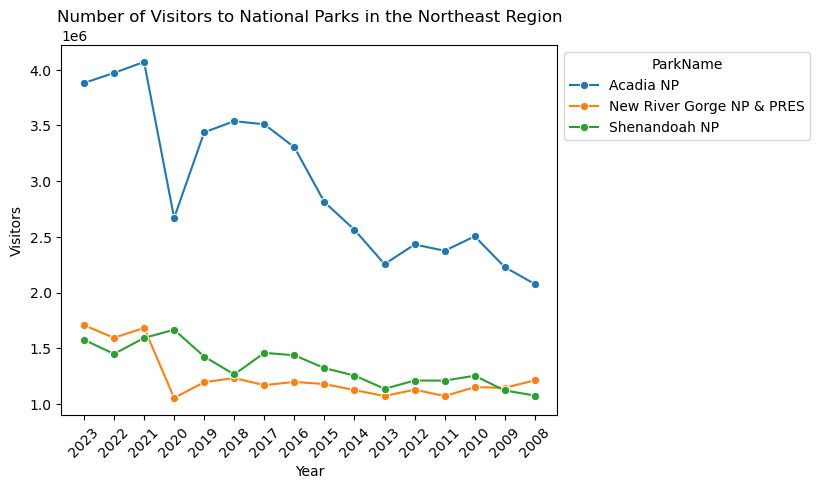

In [8]:
## A7: your code here
visual_data = national_park_df[(national_park_df['ParkType'] \
                    == 'National Park') & \
                    (national_park_df['Region'] == 'Northeast')]
plot = sns.lineplot(data = visual_data, x = 'Year', y = 'Visitors'
                , marker = 'o', hue = 'ParkName', legend = 'auto')
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1, 1))
plt.title("Number of Visitors to National Parks in the Northeast Region")
plt.xticks(rotation = 45)
plt.show()

---

### Problem A8 (2 points)

In a couple sentences, point out two things you learned about national parks in the Northeast by visualizing the time series data.

**A8: Your answer here.** (1) The most popular national park in the Northeast region is Acadia NP. (2) While both Acadia NP and New River Gorge NP & PRES experienced a decrease in visitors in 2020 (during COVID), Shenandoah NP actually had an increase in visitors in 2020. 


---

### Goal: Correlation vs Covariance

### Problem B1 (2 points)
For parks with `ParkType == 'National Park'` only, calculate the correlation between each pair of variables in this set: `Year`, `Visitors`, and `Acres`. You can do this easily in correlation matrix form using `pd.DataFrame.corr()`. Print the correlation matrix.

**Additional Resources**

- `pd.DataFrame.corr()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [9]:
# B1: your code here
corr_of_np = national_park_df[national_park_df['ParkType'] \
                                == 'National Park']
print(corr_of_np[['Year', 'Visitors', 'Acres']].corr())

                  Year  Visitors         Acres
Year      1.000000e+00  0.089494  6.427938e-16
Visitors  8.949362e-02  1.000000  2.384902e-01
Acres     6.427938e-16  0.238490  1.000000e+00


**B1 Expected Output:**

```
                  Year  Visitors         Acres
Year      1.000000e+00  0.089494  6.427938e-16
Visitors  8.949362e-02  1.000000  2.384902e-01
Acres     6.427938e-16  0.238490  1.000000e+00
```

*Note: different machines may calculate these numbers slightly differently. If you find that almost (but not all) of your values match our example output, it is probably related to the machine you're using.  We will not deduct points for this.*

---

### Problem B2 (2 points)
For parks with `ParkType == 'National Park'` only, calculate the covariance between each pair of variables in this set: `Year`, `Visitors`, and `Acres`. You can do this easily in covariance matrix form using `pd.DataFrame.cov()`. Print the covariance matrix.

In [10]:
# B2: your code here
print(corr_of_np[['Year', 'Visitors', 'Acres']].cov())

                  Year      Visitors         Acres
Year      2.127714e+01  5.040804e+05 -5.947143e-12
Visitors  5.040804e+05  1.491084e+12  1.861916e+11
Acres    -5.947143e-12  1.861916e+11  4.087679e+11


**B2 Expected Output:**

```
                  Year      Visitors         Acres
Year      2.127714e+01  5.040804e+05 -5.947143e-12
Visitors  5.040804e+05  1.491084e+12  1.861916e+11
Acres    -5.947143e-12  1.861916e+11  4.087679e+11
```

*Note: different machines may calculate these numbers slightly differently. If you find that almost (but not all) of your values match our example output, it is probably related to the machine you're using.  We will not deduct points for this.*

---

### Problem B3 (2 points)

In one sentence each:
- Describe the relationship between `Year` and `Visitors`.
- How does this compare to the correlation between `Acres` and `Visitors`?
- Are you surprised that the correlation between `Year` and `Acres` is so small? Why or why not?
- Why are the correlation and covariance values so different?

**B3: Your answer here.** 
Since the correlation between Year and Visitors is close to 0, this means that the number of visitors per year as time progresses is not heavily impacted by the year and there is no linear relationship between the two.
On the other hand, the correlation between Acres and Visitors is ~0.24 (which is also close to 0), meaning that there is a slightly greater linear relationship and the amount of Acres slightly affects the number of visitors. 
I am not very surprised that the correlation between Year and Acres is so small because what year it is currently rarely affects the amount of acres a national park has. 
Covariance values depend on the units of measurement, while correlation values are normalized to the same unit. 

---

### Goal: Calculate averages with GroupBy

### Problem C1 (2 points)
Using pandas, calculate the average number of `Visitors` for each `ParkType` in each `Year`.

*Hint #1:* You might find it helpful to first create a dataframe called avg_year_parktype_df that you can use as an input to the sns.lineplot function

*Hint #2:* When creating your avg_year_parktype_df, remember that you can group by multiple variables!

*Hint #3:* You may find it helpful to reset the index after doing this calculation, in order to select the columns that you will need for plotting.

Use `sns.lineplot` to visualize the average yearly number of `Visitors` of `National Parks` by `ParkType` as a time series.

Make sure your plot follows the 5 specifications below:
1. Use `Year` as the x-axis and `Visitors` as the y-axis.
2. Visualize this data as a line plot with markers (Set parameter `marker='o'`).
3. Use a different color for each `ParkType`. You can look up the `hue` parameter in `seaborn`'s [official documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
4. Let's put the legend outside of the graph so that it's easier to read. You can look up the `move_legend` function in `seaborn`'s [official documentation](https://seaborn.pydata.org/generated/seaborn.move_legend.html)
5. Lastly, use the `pyplot` function [`xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) to rotate the tick labels for the dates in the x-axis by 45 degrees.

The graph you produce should have one line per park type. Each line should display the mean number of visitors ($y$ value) for each year ($x$ value) for that line's park type.

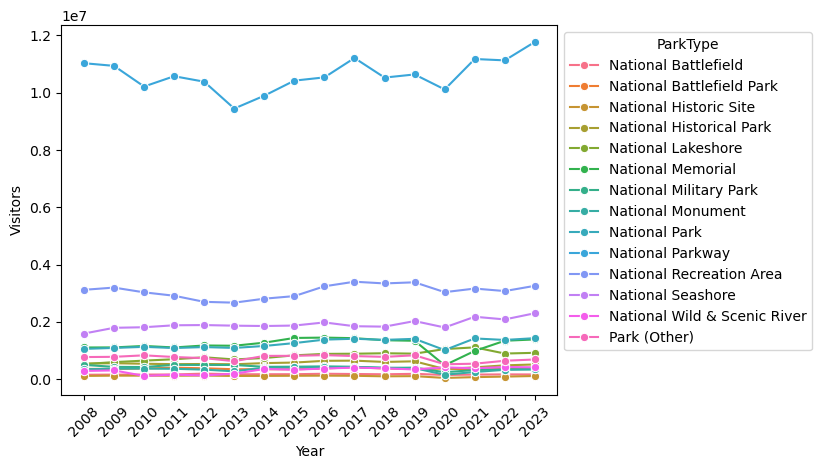

In [11]:
# C1: your code here
avg_year_parktype_df = national_park_df.groupby(['ParkType', \
                'Year'])['Visitors'].mean().reset_index()
graph_visitor_avg = sns.lineplot(data = avg_year_parktype_df, \
                x = 'Year', y = 'Visitors', marker = 'o', hue = 'ParkType')
sns.move_legend(graph_visitor_avg, 'upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.show()

---

### Problem C2 (2 points)

In one sentence each:
- What `ParkType` has the most average yearly visitors?
- Why do you think that is? (You might want to look at the `ParkNames` included in the `ParkType` you identified above to help answer this.)

**C2: Your answer here.** National Parkways have the most average yearly visitors. This may be because there are only two national parks that are classified as National Parkways, which reduces the chances for outliers in the number of visitors at each park. 


---

### Problem C3 (3 points)
**For the following problems, we will focus on parks with `ParkType == National Park` only. Create a new dataframe called `np_df_parks_only` that only contains parks from the `national_park_df` dataframe with `ParkType == National Park`.**

Using SQL, calculate the *total* number of visitors each year to parks using the new `np_df_parks_only` dataframe. Save the SQL output with the total number of visitors as a new dataframe called `yearly_sum_df`. Print the resulting dataframe. Make sure your results are printed in descending order of year.

*Note:* Remember to use a backslash `\` to break up long lines of SQL code.

In [12]:
# C3: your code here
np_df_parks_only = national_park_df[national_park_df['ParkType'] \
                            == 'National Park']

yearly_sum_df = duckdb.sql("""SELECT "Year", SUM("Visitors") AS Visitors \
                                FROM np_df_parks_only \
                                GROUP BY Year \
                                ORDER BY Year DESC""").df()
print(yearly_sum_df)

    Year    Visitors
0   2023  70104579.0
1   2022  67020383.0
2   2021  69606122.0
3   2020  49722916.0
4   2019  68930907.0
5   2018  67147809.0
6   2017  69072706.0
7   2016  67585393.0
8   2015  61668514.0
9   2014  56767085.0
10  2013  53359813.0
11  2012  54850944.0
12  2011  53240448.0
13  2010  55216816.0
14  2009  53407279.0
15  2008  51740480.0


**C3 Expected Output:**

```
    Year    Visitors
0   2023  70104579.0
1   2022  67020383.0
2   2021  69606122.0
3   2020  49722916.0
4   2019  68930907.0
5   2018  67147809.0
6   2017  69072706.0
7   2016  67585393.0
8   2015  61668514.0
9   2014  56767085.0
10  2013  53359813.0
11  2012  54850944.0
12  2011  53240448.0
13  2010  55216816.0
14  2009  53407279.0
15  2008  51740480.0
```

---

### Problem C4 (1 point)
Visualize the yearly total (using the `yearly_sum_df` dataframe) with a scatterplot using the `pyplot` function `plt.plot()`.
Also, make `Year` as the x label using `plt.xlabel()` and `Total Number of Visitors` as the y label using `plt.ylabel()`.

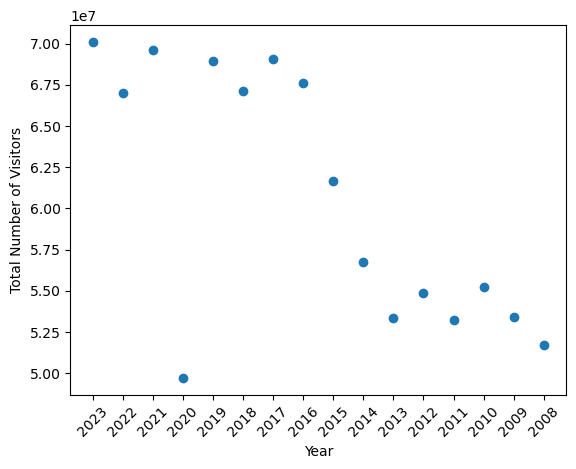

In [13]:
# C4: your code here
plt.plot(yearly_sum_df['Year'], yearly_sum_df['Visitors'], 'o')
plt.xlabel('Year')
plt.ylabel('Total Number of Visitors')
plt.xticks(rotation = 45)
plt.show()

---

### Problem C5 (2 points)
In 1-2 sentences, point out two things you notice about the national park total number of visitors over time.

**C5: Your answer here.** Over time, the total number of visitors increases (with an outlier in the data occurring in 2020 due to COVID). In addition, the total number of visitors increases at a slower rate over time. 

---

### Goal: Linear Regression
We want to train a [scikit-learn linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to predict the *total* number of visitors across all parks based on the year. In this part, use the `yearly_sum_df` dataframe you created in problem **C3**.

### Problem D1 (2 points)
It is conventional for the input data to be assigned to a variable called `X` and the output to a variable called `y`. In this case, the `Year` is the input and the number of `Visitors` is the output. You need both of these variables to be 2-d arrays, and you can either reshape with numpy or use double bracketing to achieve this. To get just the values of a series (and not the index names) you can use `.values`. Print the shape of `X` and `y`.

In [14]:
# D1: your code here
X = yearly_sum_df[['Year']].values
y = yearly_sum_df[['Visitors']].values
print(X.shape)
print(y.shape)

(16, 1)
(16, 1)


**D1 Expected Output:**
```
(16, 1)
(16, 1)
```

---

### Problem D2 (3 points)

Fit your linear regression model to `X` and `y`. Name the model `visitor_model`.

- Report the _slope_ of the linear regression model by using the model's `.coef_` function. Use [string formatting](https://docs.python.org/3/tutorial/inputoutput.html) to print "The model's slope is: `your calculation`". Round the slope number to two decimals.
- Report the _intercept_ of the linear regression model by using the model's `.intercept_` function. Use [string formatting](https://docs.python.org/3/tutorial/inputoutput.html) to print "The model's intecept is: `your calculation`". Round the intercept number to two decimals.

*Hint #1: Play around with indexing/bracketing to print only the number, without brackets.*

*Hint #2: Try using [numpy's `round` function](https://numpy.org/doc/stable/reference/generated/numpy.round.html) to round your output - you should not be rounding manually!*

In [15]:
# D2: your code here
visitor_model = LinearRegression().fit(X, y)
print("The model's slope is:", round(visitor_model.coef_[0, 0], 2))
print("The model's intercept is:", \
      round(visitor_model.intercept_[0], 2))

The model's slope is: 1160867.47
The model's intercept is: -2279138243.92


**D2 Expected Output:**
```
The model's slope is: 1160867.47
The model's intercept is: -2279138243.92
```

---

### Problem D3 (3 points)
Use your trained model to make predictions for years beyond the data we have.
* Using numpy, create a new 2d array of years between 2024-2035 (inclusive, so you should have a prediction for 2024 and a prediction for 2035, plus all years between).
* Use `visitor_model` to predict the number of visitors for these new years. Print the predicted number of visitors.

In [16]:
# D3: your code here
future_years = np.array([2024, 2025, 2026, 2027, 2028, 2029, \
                2030, 2031, 2032, 2033, 2034, 2035]).reshape(12, 1)
future_predictions = visitor_model.predict(future_years)
print(future_predictions)

past = np.array([[1964]])
print(visitor_model.predict(past))

[[70457510.5999999 ]
 [71618378.06764698]
 [72779245.53529406]
 [73940113.00294113]
 [75100980.4705882 ]
 [76261847.93823528]
 [77422715.40588236]
 [78583582.87352943]
 [79744450.34117651]
 [80905317.80882359]
 [82066185.27647018]
 [83227052.74411726]]
[[805462.54117632]]


**D3 Expected Output:**

```
[[177135.69463869]
 [180366.99254079]
 [183598.29044289]
 [186829.58834499]
 [190060.88624709]
 [193292.18414918]
 [196523.48205128]
 [199754.77995338]
 [202986.07785548]
 [206217.37575758]
 [209448.67365967]
 [212679.97156177]]
```

---

### Problem D4 (3 points)
In Lecture 7, we learned how to interpret regressions by summarizing relationships between variables, making predictions, and inspecting oddities. What relationship is there between the variables `Year` and `Visitor`? How can you use this relationship to predict the years that are not available? What odd predictions do you observe?


**D4: Your answer here.**
* As time goes on (as Year increases by 1), the number of Visitors also increases by approximately 1160867.47 visitors. 
* When X = 1900, X = 2030, and X = 2500, the number of visitors will be about -73490055, 77422715, and 623030425, respectively. 
* This model does not accurately or reasonably predict the number of Visitors when X = 1900 (or when X < 1964) as it will return a negative number of visitors, which is not possible.  

---

### Goal: Compare trends between 2 sets of parks with Linear Regression
From this point on, **we will only work with data prior to the pandemic**. In this part, start with the `np_df_parks_only` dataframe you created in problem **C3**.

We will be running two separate regressions for _most visited_ and _least visited_ parks.

### Problem E1 (2 points)

Using SQL, create a new dataframe from `np_df_parks_only` called `np_df_parks_only_pre_2020`, which only includes years up until 2019 and excludes years from 2020 onwards. Order by `Year` (in descending order) and then by `ParkName` (in ascending order). Print the first five rows of the resulting dataframe.

In [17]:
## E1: your code here
np_df_parks_only_pre_2020 = duckdb.sql(\
    """SELECT * \
        FROM np_df_parks_only \
        WHERE Year < '2020' \
        ORDER BY "Year" DESC, "ParkName"
        """).df()
print(np_df_parks_only_pre_2020.head())

      ParkName       ParkType         Region State      Acres  Year   Visitors
0    Acadia NP  National Park      Northeast    ME   49071.40  2019  3437286.0
1    Arches NP  National Park  Intermountain    UT   76678.98  2019  1659702.0
2  Badlands NP  National Park        Midwest    SD  242755.94  2019   970998.0
3  Big Bend NP  National Park  Intermountain    TX  801163.21  2019   463832.0
4  Biscayne NP  National Park      Southeast    FL  172971.11  2019   708522.0


**E1 Expected Output:**
```
      ParkName       ParkType         Region State      Acres  Year   Visitors
0    Acadia NP  National Park      Northeast    ME   49071.40  2019  3437286.0
1    Arches NP  National Park  Intermountain    UT   76678.98  2019  1659702.0
2  Badlands NP  National Park        Midwest    SD  242755.94  2019   970998.0
3  Big Bend NP  National Park  Intermountain    TX  801163.21  2019   463832.0
4  Biscayne NP  National Park      Southeast    FL  172971.11  2019   708522.0
```

---

### Problem E2 (4 points)
Using SQL, create a new table called `average_park_visitors_df` that groups the `np_df_parks_only_pre_2020` data by `ParkName` and finds the average number of visitors. Print the first five rows of the resulting dataframe, sorted by the average number of visitors in descending order.

In [18]:
# E2: your code here
average_park_visitors_df = duckdb.sql(\
    """SELECT "ParkName", AVG("Visitors") AS Visitors \
        FROM np_df_parks_only_pre_2020 \
        GROUP BY "ParkName" \
        ORDER BY "Visitors" DESC \
    """).df()
print(average_park_visitors_df.head())

          ParkName      Visitors
0  Grand Canyon NP  5.108550e+06
1      Yosemite NP  4.033108e+06
2   Yellowstone NP  3.679352e+06
3          Zion NP  3.428734e+06
4       Olympic NP  3.144111e+06


**E2 Expected Output:**
```
          ParkName      Visitors
0  Grand Canyon NP  5.108550e+06
1      Yosemite NP  4.033108e+06
2   Yellowstone NP  3.679352e+06
3          Zion NP  3.428734e+06
4       Olympic NP  3.144111e+06
```

---

### Problem E3 (2 points)

Using SQL, create a list of the names of the `10` parks with the highest average number of visitors. Name the list `most_visited_parks`. Similarly, create a list of the names of the `10` parks with the lowest average number of visitors in a variable called `least_visited_parks`. You can turn a `pd.Series` to a list by using the [`tolist()` function](https://pandas.pydata.org/docs/reference/api/pandas.Series.tolist.html). Print both `most_visited_parks` and `least_visited_parks`.

*Hint: To select just ten parks, use the SQL [LIMIT](https://www.w3schools.com/mysql/mysql_limit.asp) keyword.*

In [19]:
## E3: your code here
most_visited_parks = duckdb.sql(\
    """SELECT "ParkName" \
        FROM average_park_visitors_df \
        ORDER BY "Visitors" DESC
        LIMIT 10""").df()
most_visited_parks = most_visited_parks['ParkName'].tolist()
print(most_visited_parks)

least_visited_parks = duckdb.sql(\
    """SELECT "ParkName" \
        FROM average_park_visitors_df \
        ORDER BY "Visitors" ASC \
        LIMIT 10""").df()
least_visited_parks = least_visited_parks['ParkName'].tolist()
print(least_visited_parks)

['Grand Canyon NP', 'Yosemite NP', 'Yellowstone NP', 'Zion NP', 'Olympic NP', 'Grand Teton NP', 'Acadia NP', 'Glacier NP', 'Cuyahoga Valley NP', 'Gateway Arch NP']
['Kobuk Valley NP', 'Isle Royale NP', 'North Cascades NP', 'Dry Tortugas NP', 'Great Basin NP', 'Congaree NP', 'Pinnacles NP', 'Voyageurs NP', 'Kenai Fjords NP', 'Channel Islands NP']


**E3 Expected Output:**
```
['Grand Canyon NP', 'Yosemite NP', 'Yellowstone NP', 'Zion NP', 'Olympic NP', 'Grand Teton NP', 'Acadia NP', 'Glacier NP', 'Cuyahoga Valley NP', 'Gateway Arch NP']
['Kobuk Valley NP', 'Isle Royale NP', 'North Cascades NP', 'Dry Tortugas NP', 'Great Basin NP', 'Congaree NP', 'Pinnacles NP', 'Voyageurs NP', 'Kenai Fjords NP', 'Channel Islands NP']
```

---

### Problem E4 (2 points)

Using pandas, create two tables,
- `most_visited_parks_df` by subsetting `np_df_parks_only_pre_2020` to only contain parks that are in the list of `most_visited_parks`.
- `least_visited_parks_df` by subsetting `np_df_parks_only_pre_2020` to only contain parks that are in the list of `least_visited_parks`.

Then, calculate the average number of visitors over all years of data prior to 2020 (i.e. the average of the `Visitors` column; you do not have to group by any variables) for the most visited set of parks and for the least visited parks.
- Use string formatting to print "The average number of visitors to the 10 most popular national parks: `your calculation`". Round to two decimals.
- Use string formatting to print "The average number of visitors to the 10 least popular national parks: `your calculation`". Round to two decimals.

*Hint #1: You may find the pandas function [`.isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html) useful.*

*Hint #2: Try using [numpy's `round` function](https://numpy.org/doc/stable/reference/generated/numpy.round.html) to round your output - you should not be rounding manually!*

In [20]:
# E4: your code here
most_visited_parks_df = np_df_parks_only_pre_2020\
    [np_df_parks_only_pre_2020['ParkName'].isin(most_visited_parks)]
least_visited_parks_df = np_df_parks_only_pre_2020\
    [np_df_parks_only_pre_2020['ParkName'].isin(least_visited_parks)]

print(\
"The average number of visitors to the 10 most popular national parks:",\
    round(most_visited_parks_df['Visitors'].mean(), 2))
print(\
"The average number of visitors to the 10 least popular national parks:",\
    round(least_visited_parks_df['Visitors'].mean(), 2))

The average number of visitors to the 10 most popular national parks: 3184917.36
The average number of visitors to the 10 least popular national parks: 143207.07


**E4 Expected Output:**

```
The average number of visitors to the 10 most popular national park: 3184917.36
The average number of visitors to the 10 least popular national park: 143207.07
```

---

### Problem E5 (3 points)
Fit a linear regression to the `most_visited_parks_df`. Specifically, use `Year` as the input and the number of `Visitors` as the output. Calculate the slope and intercept for the most visited parks.
- Use string formatting to print "The model's slope is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's intercept is: `your calculation`". Round to two decimals.

In [21]:
# E5: your code here
lin_reg_most_visited = LinearRegression().fit(most_visited_parks_df\
        [['Year']].values, most_visited_parks_df[['Visitors']].values)
print("The model's slope is:", \
      round(lin_reg_most_visited.coef_[0, 0], 2))
print("The model's intercept is:", \
      round(lin_reg_most_visited.intercept_[0], 2))

The model's slope is: 87540.0
The model's intercept is: -173076873.35


**E5 expected Output:**  

```
The model's slope is: 87540.0
The model's intercept is: -173076873.35
```

---

### Problem E6 (3 points)
Fit a linear regression to the `least_visited_parks_df`. Specifically, use `Year` as the input and the number of `Visitors` as the output. Calculate the slope and intercept for the most visited parks.
- Use string formatting to print "The model's slope is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's intercept is: `your calculation`". Round to two decimals.

In [22]:
# E6: your code here
lin_reg_least_visited = LinearRegression().fit(least_visited_parks_df\
        [['Year']].values, least_visited_parks_df[['Visitors']].values)
print("The model's slope is:", \
      round(lin_reg_least_visited.coef_[0, 0], 2))
print("The model's intercept is:", \
      round(lin_reg_least_visited.intercept_[0], 2))

The model's slope is: 3231.3
The model's intercept is: -6363011.26


**E6 Expected Output**  

```
The model's slope is: 3231.30
The model's intercept is: -6363011.26
```

---

### Problem E7 (2 points)
In 1-2 sentences, compare the slope of the least visited parks to the slope of the most visited parks. Explain why these numbers are different and/or similar.

**E7: Your answer here.**  
The slope of the least visited parks is less than the slope of the most visited parks because the number of Visitors for each Year increases at a slower rate for least visited parks than than for most visited parks. This may be because the most visited parks get more publicity and acknowledgement than the least visited parks, which leads to an increasing number of visitors each year to those parks. 

---

### Goal: Transformations and Logistic Regression

### Problem F1 (5 points)

In class we mentioned that there are four combinations of logs for inputs and outputs (assume that $\log(x) = \ln(x)$):

1. $y_i = \alpha + \beta x_i + \epsilon_i$
1. $y_i = \alpha + \beta \log(x_i) + \epsilon_i$
1. $\log(y_i) = \alpha + \beta x_i + \epsilon_i$ or equivalently $y_i = e^{\alpha + \beta x_i + \epsilon_i}$
1. $\log(y_i) = \alpha + \beta \log(x_i) + \epsilon_i$ or equivalently $y_i = e^{\alpha + \beta \log(x_i) + \epsilon_i}$

Match these equations to the following statements. Remember that $e^{λ + μ} = e^\lambda e^\mu$.

- (A) If you increase $x$ by 1, we expect $y$ to change by $\beta$
- (B) If you multiply $x$ by $e\ (≈ 2.7)$, we expect $y$ to change by a factor of $e^\beta$
- (C) If you multiply $x$ by $e\ (≈ 2.7)$, we expect $y$ to change by $\beta$
- (D) If you increase $x$ by 1, we expect $y$ to change by a factor of $e^\beta$

**F1: Your answer here.**
**Match each equation (1,2,3,4) with its description (A,B,C,D).**

Equation 1 matches with Description A. Equation 2 matches with Description C. Equation 3 matches with Description D. Equation 4 matches with Description B.  

---

### Problem F2 (5 points)

Match the following scenarios to one of the four equations in **Problem F1**, which may be used multiple times or not at all.  Type out the equation each corresponds to (e.g. options 1-4 from F1) using Markdown.

*Hint: We don't expect you to be familiar with these relationships off the top of your head! Click the links to read more about them.*

|| Input | Output |
|---| --- | --- |
|a.| Days since deposit | [$50 that you leave in your savings account to collect compound interest](https://www.investor.gov/financial-tools-calculators/calculators/compound-interest-calculator) |
|b.| Years from 1950-2023 | [The population of the US](https://ourworldindata.org/explorers/population-and-demography?facet=none&country=~USA&hideControls=false&Metric=Population&Sex=Both+sexes&Age+group=Total&Projection+Scenario=None) |
|c.| Years 10,000 BCE to 2024 | [The population of the world](https://ourworldindata.org/population-growth-over-time)   |
|d.| An animal's body mass | [The animal's metabolic rate](https://www.nature.com/scitable/knowledge/library/body-size-and-temperature-why-they-matter-15157011/)
|e.| Days after Feb 1, 2020 | [Cumulative Global COVID cases](https://ourworldindata.org/grapher/cumulative-deaths-and-cases-covid-19) |



**F2: Your answer here.** \
A. $\log(y_i) = \alpha + \beta x_i + \epsilon_i$ (log-linear) \
B. $y_i = \alpha + \beta x_i + \epsilon_i$ (linear) \
C. $\log(y_i) = \alpha + \beta x_i + \epsilon_i$ (log-linear) \
D. $\log(y_i) = \alpha + \beta \log(x_i) + \epsilon_i$ (log-log) \
E. $y_i = \alpha + \beta \log(x_i) + \epsilon_i$ (linear-log) 

---

### Goal: Logistic Regression in Python

The following questions were inspired by [Kaggle's "Titanic" competition](https://www.kaggle.com/competitions/titanic/overview) (which we encourage you to check out - and maybe compete in - during and after completing this homework!).

### Problem G1 (1 points)

Each row of the file `titanic.csv` represents one passenger on board the Titanic, which famously sank on April 15, 1921. The column `Survived` is equal to `1` if the passenger survived the shipwreck and `0` otherwise. The passenger's `Sex`, `Age`, and `Fare` (the price they paid for their ticket) are all included in the dataset. Load the file and name the dataframe `titanic`. Print the first five rows.

In [23]:
# G1: your code here
titanic = pd.read_csv('titanic.csv')
print(titanic.head())

   Survived     Sex   Age  Fare
0         0    male  22.0     7
1         1  female  38.0    71
2         1  female  26.0     8
3         1  female  35.0    53
4         0    male  35.0     8


**G1 Expected Output:**
```
   Survived     Sex   Age  Fare
0         0    male  22.0     7
1         1  female  38.0    71
2         1  female  26.0     8
3         1  female  35.0    53
4         0    male  35.0     8
```

---

### Problem G2 (3 points)

Use `seaborn` to create a scatter plot showing the survival rates of passengers based on their `Fare`, `Age`, and `Sex`.

Plot `Fare` on the $x$-axis and `Age` on the $y$-axis. Color by `Survived` using the `hue` parameter. Finally, set the shape of each marker based on `Sex` by using the `style` parameter (see [seaborn's documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for details).

*Hint: it's fine to pass string values to `hue` and `style`.*

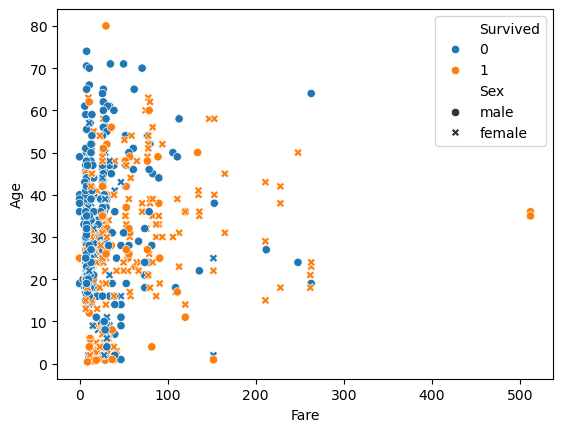

In [24]:
# G2: your code here
sns.scatterplot(titanic, x = 'Fare', y = 'Age', \
                hue = 'Survived', style = 'Sex')
plt.show()

---

### Problem G3 (2 points)

Answer in 2-3 sentences: Comment on whether you think `Survived` can be predicted from `Sex`, `Fare`, and `Age`, and which of those variables will be more accurate. Explain your answer by describing properties of the scatter plot.

**G3: Your discussion here.**
I think Survived can be predicted more accurately from Sex and Fare but not Age. For the points that show that Survived = 1, most of them show that Sex = female, and these points are also much more concentrated on the side where Fare is less. However, these points are randomly distributed among Age, making it less accurate to predict Survived. 

---

### Problem G4 (3 points)
We have to do a little bit of work before we can run a logistic regression on our data:
- First, let's convert the `Sex` variable into a binary indicator `Is_Male` that is equal to `1` if the passenger's sex is `male` and `0` if the passenger's sex is `female`. The [.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function can help you do this.
- Second, let's make sure we don't have missing data, which will cause sklearn to throw an error. Let's remove rows with missing data from our dataset using the `dropna` function in pandas (see the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) for details).
- Print the first five rows of the `titanic` dataframe.
- Print the shape of the `titanic` dataframe

In [25]:
# G4: your code here
titanic['Is_Male'] = titanic['Sex'].map({'male': 1, \
                                    'female': 0})
titanic = titanic.dropna()
print(titanic.head())
print(titanic.shape)

   Survived     Sex   Age  Fare  Is_Male
0         0    male  22.0     7        1
1         1  female  38.0    71        0
2         1  female  26.0     8        0
3         1  female  35.0    53        0
4         0    male  35.0     8        1
(714, 5)


**G4 Expected Output:**
```
   Survived     Sex   Age  Fare  Is_Male
0         0    male  22.0     7        1
1         1  female  38.0    71        0
2         1  female  26.0     8        0
3         1  female  35.0    53        0
4         0    male  35.0     8        1
(714, 5)
```

---

### Problem G5 (3 points)

Use `sklearn` to fit a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model that predicts `Survived` given `Fare` and name the model `fare_model`.  Print the coefficient and intercept of the resulting model in a string formatting. Round these numbers to two decimals.
- Use string formatting to print "The model's coefficient is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's intercept is: `your calculation`". Round to two decimals.

In [26]:
# G5: your code here
X = titanic[['Fare']].values
y = titanic['Survived'].values
fare_model = LogisticRegression()
fare_model.fit(X, y)

print("The model's coefficient is:", \
      round(fare_model.coef_[0, 0], 2))
print("The model's intercept is:" , \
      round(fare_model.intercept_[0], 2))

The model's coefficient is: 0.02
The model's intercept is: -0.9


**G5 Expected Output:**
```
The model's coefficient is: 0.02
The model's intercept is: -0.9
```

---

### Problem G6 (4 points)

Use `fare_model`'s `predict_proba` to calculate the probability that each passenger will have a value of `Survived`. Add predicted probability as a new variable `Fare_Survival_Pred` on the dataframe.

*Hint: the function `predict_proba` returns a 2D array containing the probability of each output (`0`, or did not survive, and `1`, or did survive) for each input. Select the column with index `1`, corresponding to 'did survive'.*

Create a scatter plot showing `Fare` on the $x$-axis, `Fare_Survival_Pred` on the $y$-axis, with `hue` from `Survived`.


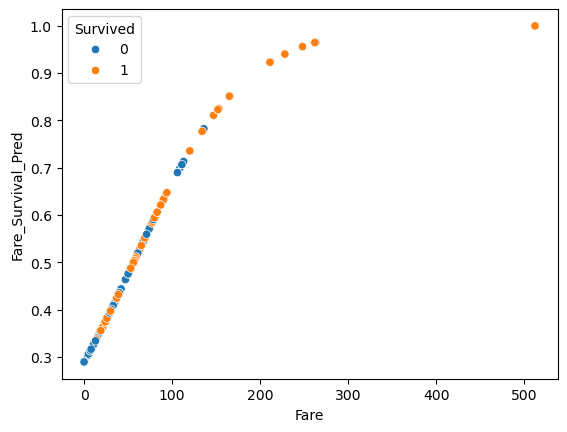

In [27]:
# G6: your code here
titanic['Fare_Survival_Pred'] = \
            fare_model.predict_proba(X)[:,1]
sns.scatterplot(titanic, x = 'Fare', \
            y = 'Fare_Survival_Pred', hue = 'Survived')
plt.show()

---

### Problem G7 (4 points)

Summarize relationships between variables, make predictions, and inspect oddities. What probability of survival would a passenger with a free ($0) ticket on the Titanic have?

**G7: Your answer here.**

* **Replace this with your summary of relationships between variables (1 sentence).**
* For a 1% increase in the fare for the titanic, we expect to see a corresponding increase 0.01(0.02) = 0.0002 in probability that the passenger will have surived.
* **Replace this with your predictions (1 sentence).**
* If x = e (Fare = 2.72), this model predicts that the probability of survival is -0.88.
* **Replace this with your inspection of oddities (1 sentence).**
* If the fare is free (x = 0), the model cannot accurately predict a reasonable probability of survival. 

---

### Problem G8 (3 points)

Repeat the process from G5, replacing `Fare` with `Age` and name the model `age_model`.
- Use string formatting to print "The model's coefficient is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's intercept is: `your calculation`". Round to two decimals.

In [28]:
# G8: your code here
X = titanic[['Age']].values
y = titanic['Survived'].values
age_model = LogisticRegression()
age_model.fit(X, y)

print("The model's coefficient is:", \
      round(age_model.coef_[0, 0], 2))
print("The model's intercept is:" , \
      round(age_model.intercept_[0], 2))

The model's coefficient is: -0.01
The model's intercept is: -0.06


**G8 Expected Output:**
```
The model's coefficient is: -0.01
The model's intercept is: -0.06
```

---

### Problem G9 (4 points)
Using the new predictions of the `age_model`, create a new column named `Age_Survival_Pred` in the `titanic` dataframe. Then, generate a scatterplot where the x-axis is `Age` and y-axis is `Age_Survival_Pred`. Set `hue` parameter to `Survived`.

*Hint: remember that this function returns a 2D array containing the probability of each output (`0`, or did not survive, and `1`, or did survive) for each input. Select the column with index `1`, corresponding to 'did survive'.*

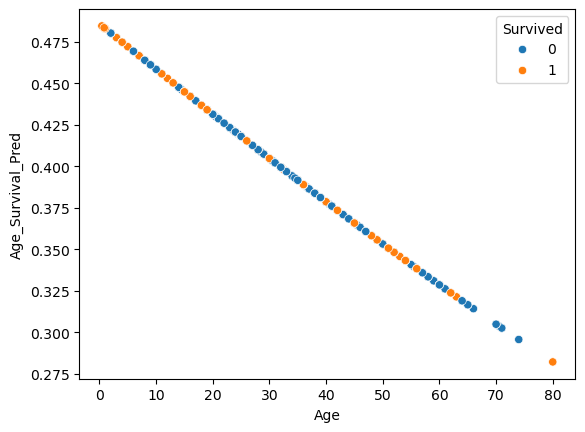

In [29]:
# G9: your code here
titanic['Age_Survival_Pred'] = \
        age_model.predict_proba(X)[:, 1]
sns.scatterplot(titanic, x = 'Age', \
        y = 'Age_Survival_Pred', hue = 'Survived')
plt.show()

---

### Problem G10 (3 points)

Train a third logistic regression model with *all three explanatory variables*, `Fare`, `Age`, and `Is_Male`, as inputs.
- Use string formatting to print "The model's Fare coefficient is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's Age coefficient is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's Is_Male coefficient is: `your calculation`". Round to two decimals.
- Use string formatting to print "The model's intercept is: `your calculation`". Round to two decimals.

In [30]:
# G10: your code here
x = titanic[['Fare', 'Age', 'Is_Male']].values
y = titanic['Survived'].values

all_model = LogisticRegression()
all_model.fit(x, y)

print("The model's Fare coefficient is:", \
      round(all_model.coef_[0, 0], 2))
print("The model's Age coefficient is:", \
      round(all_model.coef_[0, 1], 2))
print("The model's Is_Male coefficient is:", \
      round(all_model.coef_[0, 2], 2))
print("The model's intercept is:", \
      round(all_model.intercept_[0], 2))

The model's Fare coefficient is: 0.01
The model's Age coefficient is: -0.01
The model's Is_Male coefficient is: -2.27
The model's intercept is: 0.89


**G10 Expected Output:**
```
The model's Fare coefficient is: 0.01
The model's Age coefficient is: -0.01
The model's Is_Male coefficient is: -2.27
The model's intercept is: 0.89
```

---

### Problem G11 (2 points)
In Lecture 7, we learned how to interpret regressions by summarizing relationships between variables, making predictions, and inspecting oddities. What relationship is there between the variables `Age` and `Survived`? What about between the variables `Sex` and `Survived`? What odd predictions do you observe?

**G11: Your answer here.**

* As Age increases by 1 when all else is equal, we expect that the probability of those passengers surviving decreases by 0.01. 
* As Is_Male increases by 1 (where Sex = male) when all else is equal, we expect that the probability of those passengers surviving decreases by 2.27 relative to the passenger being a female. 
* When all else is equal, the equation for the predicted probability of passengers surviving the Titanic still returns a valid probability even when Is_Male = 2, which should never happen since Is_Male only takes two values (0 or 1).

---

### Problem G12 (2 points)

- In two sentences: Compare the signs of the coefficients among models G5, G8, and G10. Why are they the same or different?
- In one sentence: revisit your response to **G3**. Which variable among `Fare`, `Age`, and `Sex` appears to have the biggest impact on predicting survival?
- How much would a male passenger need to have paid for his ticket to have the same chance of survival as a female passenger who paid $10, assuming both passengers are 18 years old?

**G12: Your answer here.**
The signs of the coefficients among models G5, G8, and G10 are different because the covariates that are being fit into the models are different. Each explanatory variable has a different relationship with the probability of Survived, which will give us different signs for their coefficients.  \
In G3, I believed that Sex and Fare had the greatest impact on predicting survival, but now I believe that Sex has the single greated impact on survival probability. \
A male passenger would have needed to pay 237 dollars for his ticket to have the same chance of survival as a female passenger who paid $10, assuming both passengers are 18 years old.

---
### Goal: Web-Scraping in Python

Remember the web-scraping tutorial we went over in Discussion 3? We will be scraping data from (a copy of) the [Wikipedia page of Cornell](https://koenecke.infosci.cornell.edu/files/info2950/Cornell%20University%20-%20Wikipedia.html) and outputting the information in a nice Pandas DataFrame. We will use the `requests` library to do this. Read more about it [here](https://requests.readthedocs.io/en/latest/).

Note that we are going through the entirety of Section H in Discussion 4!

In [31]:
# Given code:
wiki_url = "https://koenecke.infosci.cornell.edu/files/info2950/Cornell%20University%20-%20Wikipedia.html"

### Problem H1 (2 points)
Use request's `get()` function and save the output to `wiki_result`. Print the wiki_result's `status_code`. If the status code is not `200`, it means that something went wrong in the request. Write code to print the wiki_result's `reason` for what went wrong if the status code is not `200`.

In [32]:
# H1: your code here
wiki_result = requests.get(wiki_url)
print(wiki_result.status_code)
if wiki_result.status_code != 200:
    print("Something went wrong:", \
          wiki_result.status_code, wiki_result.reason)

200


**H1 Expected Output:**
```
200
```

---

### Problem H2 (1 point)

Convert `wiki_result` with the `requests` library to a text string using `.text` and save the converted output as `wiki_text`. Print the `type` of the converted output.

In [33]:
## H2: your code here
wiki_text = wiki_result.text
print(type(wiki_text))

<class 'str'>


**H2 Expected Output:**
```
<class 'str'>
```

---

### Problem H3 (1 point)
Use the function `BeautifulSoup` on the `wiki_text` object we created in H2. Include the parameter "html.parser" to parse the text as HTML and save the output as an object called `page`. Print the type of `page`.

Here is the documentation for [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [34]:
# H3: your code here
page = BeautifulSoup(wiki_text, "html.parser")
print(type(page))

<class 'bs4.BeautifulSoup'>


**H3 Expected Output:**
```
<class 'bs4.BeautifulSoup'>
```

---

### Problem H4 (2 point)
Using the `inspect` menu after right-clicking, manually inspect element on the website. In the HTML, locate the main table on the website, which includes Motto, Type, Established, Founder, Etc. Identify the tag and class for this table.

**Write the tag and class here:**
The tag for this table is "table", and its class is "infobox vcard."

---

### Problem H5 (1 point)
Use page's `find` to locate that same tag and class, and save the output as an object called `infobox`. Print the length of `infobox`.

In [35]:
# H5: your code here
infobox = page.find("table", {"class": "infobox vcard"})
print(len(infobox))

2


**H5 Expected Output:**
```
2
```

---

### Problem H6 (1 point)

Now we will extract the information that we need from the table. First, we need to identify the table rows. From `infobox`, use `find_all` to find all the table rows "tr" and save the output to an object called `table_rows`. Print the length of `table_rows`.

*Note:* `tr` tags define a table row in HTML.

In [36]:
# H6: your code here
table_rows = infobox.find_all("tr")
print(len(table_rows))

26


**H6 Expected Output:**
```
26
```

---

### Problem H7 (2 point)

Now that we have the table rows, we can iterate through the columns to extract the relevant labels and corresponding values. Part (a): Using the helper code below, convert each label and value to text.

*Note:* `th` tags define a header cell in an HTML table while `td` defines a standard "data" cell."

In [37]:
# Given code
labels = []
values = []
for table in table_rows: # for every row, get the label and the value
 label = table.find('th')
 value = table.find('td')
 if label != None:
     # H7 part a: Your code here
    label = label.text

 if value != None:
     # H7 part a: Your code here
     value = value.text

 labels.append(label)
 values.append(value)

Part (b): Print `True` if the length of the labels is equal to the length of the values. Otherwise, print `False`.

In [38]:
# H7 part b: Your code here
if len(labels) == len(values):
    print(True)
else: 
    print(False)

True


---

### Problem H8 (1 point)
Using the labels and values, make a Pandas Dataframe. Filter out all rows where `Labels` is `None`. Print the full dataframe.

*Hint: Remember that `None` is **not** a string called "None"; it is an object! In pandas, you can filter out `None` data with the [`notna()` function](https://pandas.pydata.org/docs/reference/api/pandas.Series.notna.html).*

In [39]:
# H8: Your code here
dict = {"Labels": labels, "Values": values}
wiki_df = pd.DataFrame(data = dict)
wiki_df = wiki_df[wiki_df["Labels"].notna()]
print(wiki_df)

                   Labels                                             Values
2                   Motto  “I would found an institution where any person...
3                    Type          Private[4] land-grant research university
4             Established         April 28, 1864; 160 years ago (1864-04-28)
5                 Founder             \nEzra Cornell\nAndrew Dickson White\n
6           Accreditation                                              MSCHE
7   Academic affiliations           AAUCOFHENAICUSUNYURASea-grantSpace-grant
8               Endowment                            $10.0 billion (2023)[5]
9                  Budget                             $5.4 billion (2023)[6]
10              President                                  Michael Kotlikoff
11                Provost                                     John Siliciano
12         Academic staff  1,639 in Ithaca, New York1,235 in New York Cit...
13               Students                              26,284 (fall 2023)[7]

**H8 Expected Output:**
```
                   Labels                                             Values
2                   Motto  “I would found an institution where any person...
3                    Type          Private[4] land-grant research university
4             Established         April 28, 1864; 160 years ago (1864-04-28)
5                 Founder             \nEzra Cornell\nAndrew Dickson White\n
6           Accreditation                                              MSCHE
7   Academic affiliations           AAUCOFHENAICUSUNYURASea-grantSpace-grant
8               Endowment                            $10.0 billion (2023)[5]
9                  Budget                             $5.4 billion (2023)[6]
10              President                                  Michael Kotlikoff
11                Provost                                     John Siliciano
12         Academic staff  1,639 in Ithaca, New York1,235 in New York Cit...
13               Students                              26,284 (fall 2023)[7]
14         Undergraduates                              16,071 (fall 2023)[7]
15          Postgraduates                              10,207 (fall 2023)[7]
16               Location  Ithaca, New York, United States42°27′13″N 76°2...
17                 Campus  Small city[8], 745 acres (301 ha)[citation nee...
18      Other campuses[9]                                       New YorkDoha
19              Newspaper             The Cornell Daily SunCornell Chronicle
20                 Colors                     Carnelian red and white[10]   
21               Nickname                                            Big Red
22  Sporting affiliations       NCAA Division I FCS – Ivy LeagueIRAEARCEAWRC
23                 Mascot                Touchdown the Bear (unofficial)[11]
24                Website                                       cornell.edu
```

---

### Problem H9 (1 point)
Use the `iloc` function to print the full value associated with the "Motto" label from wiki_df.

In [40]:
# H9: Your code here
print(wiki_df.iloc[0, 1])

“I would found an institution where any person can find instruction in any study”[2][3]


**H9 Expected Output:**

```
“I would found an institution where any person can find instruction in any study”[2][3]
```

---
**How long it did it take you to complete this homework?**

Add your answer (an estimate in hours) in the cell below.

*Time taken here*: 10-12 hours